## Task 3: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

required libraries: Numpy, Pandas for calculations and Data Manipulation

matplotlib and seaborn for visualization

and Scikit-learn for machine learning model Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("bank-full[1].csv",delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']



## Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
for col in categorical_col:
 data[col]=le.fit_transform(data[col])

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,4,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,4,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,4,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,4,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,4,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,16,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,16,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,16,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,16,9,508,4,-1,0,3,no


In [13]:
X=data.drop("y",axis=1)
Y=data["y"].apply(lambda x: 1 if x=="yes" else 0)

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y
 ,test_size=0.3
 ,random_state=42)

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [21]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=20,random_state=42)


In [23]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)

In [25]:
ypred=clf.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# accuracy_score, classification_report

In [27]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
accuracy = accuracy_score(ytest,ypred)
print("Accuracy:", accuracy)

Accuracy: 0.888897080507225


In [31]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     11966\n           1       0.57      0.22      0.32      1598\n\n    accuracy                           0.89     13564\n   macro avg       0.74      0.60      0.63     13564\nweighted avg       0.87      0.89      0.87     13564\n'

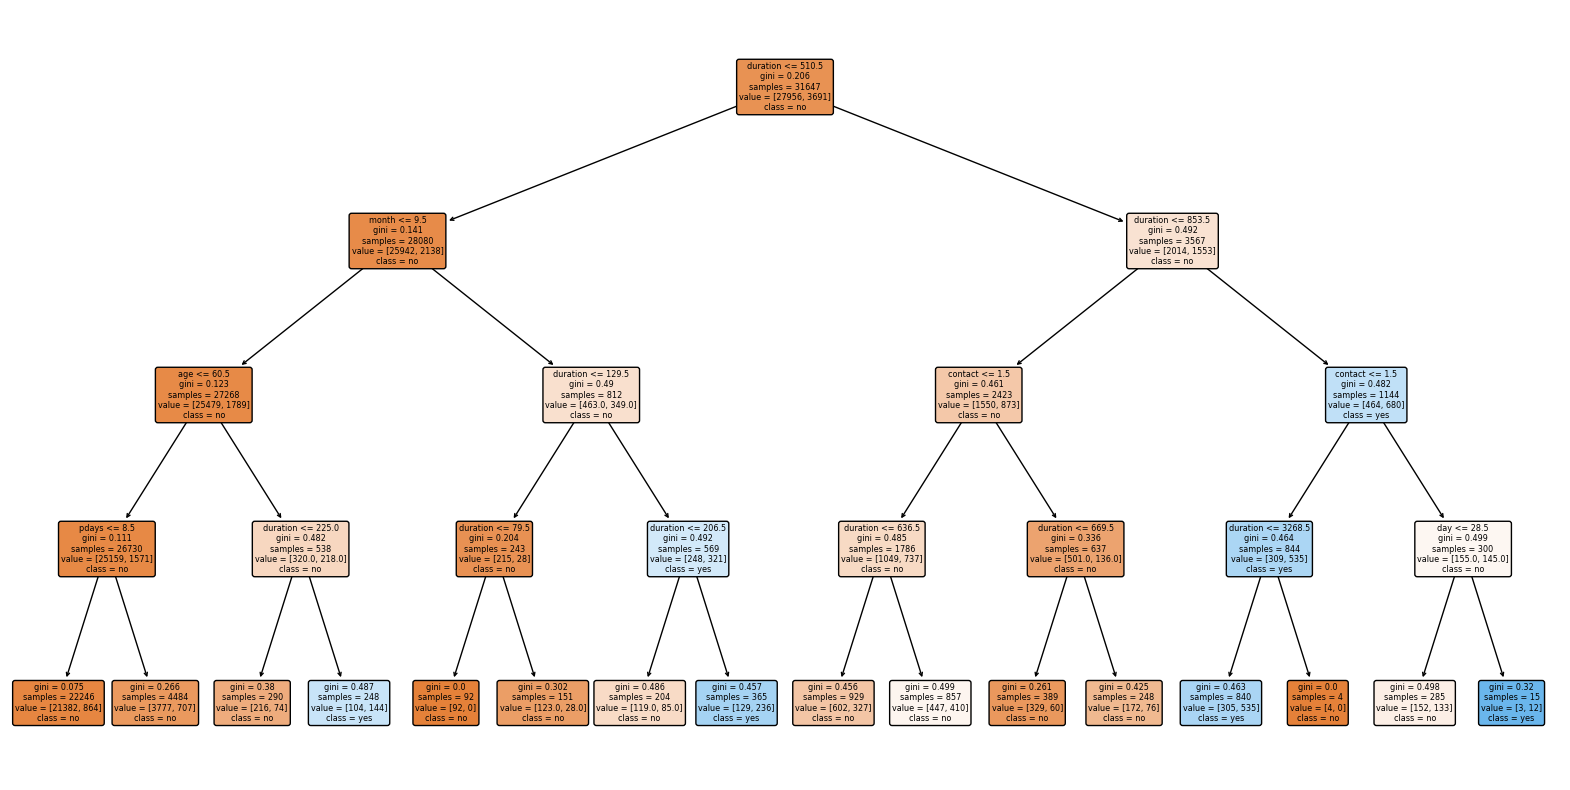

In [33]:
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=X.columns, class_names=["no","yes"],filled=True,rounded=True)
plt.show()